Precisión: 34.33%

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

       dedo1       0.26      0.39      0.31       100
       dedo2       0.45      0.50      0.47       100
       dedo3       0.26      0.28      0.27       100
       dedo4       0.53      0.46      0.49       100
       dedo5       0.32      0.33      0.33       100
        mano       0.23      0.10      0.14       100

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.34       600



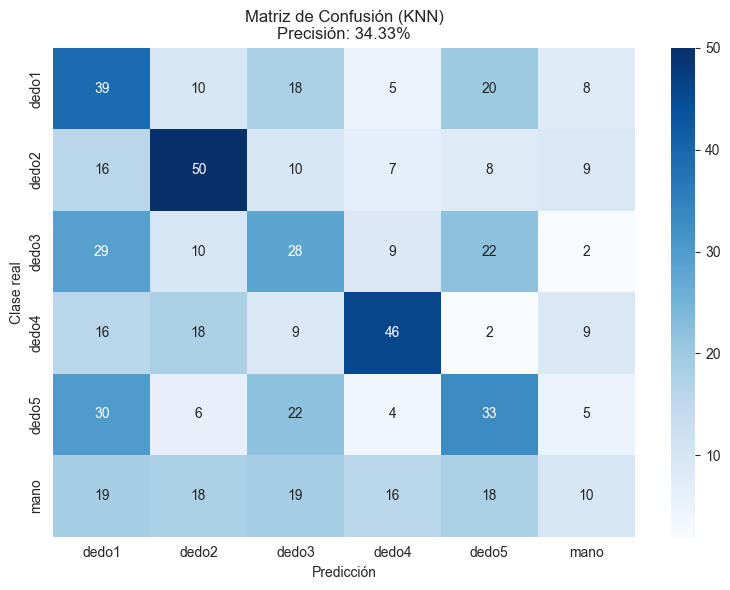

['modelo_knn_emg.pkl']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# === 1. Cargar y transformar los datos ===
df = pd.read_csv("hand.csv")
df_long = df.melt(var_name="clase", value_name="valor")

# Separar X e y
X = df_long["valor"].values.reshape(-1, 1)
y = df_long["clase"].values

# === 2. Dividir en entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 3. Entrenar modelo KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# === 4. Evaluar ===
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2%}")

# Reporte detallado
print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

# === 5. Matriz de confusión ===
matriz = confusion_matrix(y_test, y_pred, labels=knn.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicción")
plt.ylabel("Clase real")
plt.title(f"Matriz de Confusión (KNN)\nPrecisión: {accuracy:.2%}")
plt.tight_layout()
plt.show()

